In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
import scipy
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
from pylab import plot, title, show , legend

import plotly
from plotly.graph_objs import Scatter, Layout

In [23]:
def GroupColFunc(row):
    week = datetime.date(row['Year'], row['Month'], row['DayofMonth']).isocalendar()[1]
    if (row['Month'] == 1 and week > 50):
        return 1.0
    else:
        if (row['Month'] == 12 and week == 1):
            return 53.0
        else:
            return week

In [24]:
def GenerateDataWithWeeks(years):
    for year in years:
        df = pd.read_csv(year+'.csv')
        woyserie = df.apply(lambda row: GroupColFunc(row), axis=1)
        df = df.assign(WeekOfYear= woyserie)
        df.to_csv(year+'wy.csv')

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [17]:
def plotCancellationCodesBy(df, index):  
    # (A = carrier, B = weather, C = NAS, D = security)
    var = df[df.Cancelled > 0].groupby([index,'CancellationCode'])[index].count() / df.groupby([index])[index].count()
    var.unstack().plot(kind='bar',stacked=True, color=['red','blue','green','pink'], grid=False)
    plt.show()

In [39]:
years = ['2003','2004','2005','2006','2007','2008']

totalW = pd.Series()
cancelledW = pd.Series()
cancelledAW = pd.Series()
cancelledBW = pd.Series()
delayW = pd.Series()
delayCW = pd.Series()
delaywW = pd.Series()
delayNW = pd.Series()
delaySW = pd.Series()
delayLW = pd.Series()

totalM = pd.Series()
cancelledM = pd.Series()
cancelledAM = pd.Series()
cancelledBM = pd.Series()
delayM = pd.Series()
delayCM = pd.Series()
delaywM = pd.Series()
delayNM = pd.Series()
delaySM = pd.Series()
delayLM = pd.Series()

totalY = pd.Series()
cancelledY = pd.Series()
cancelledAY = pd.Series()
cancelledBY = pd.Series()
delayY = pd.Series()
delayCY = pd.Series()
delaywY = pd.Series()
delayNY = pd.Series()
delaySY = pd.Series()
delayLY = pd.Series()
for year in years:
    df = pd.read_csv(year+'.csv')

    ser = df.groupby(['Year','Month'])['Month'].count()
    totalM = totalM.append(ser)
    ser = df[df.Distance <= r1].groupby(['Year','Month'])['Month'].count()
    distC = distC.append(ser)
    ser = df[(df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    distM = distM.append(ser)
    ser = df[df.Distance > r2].groupby(['Year','Month'])['Month'].count()
    distG = distG.append(ser)

    ser = df[df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
    ctotalM = ctotalM.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    cdistC = cdistC.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    cdistM = cdistM.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    cdistG = cdistG.append(ser)

    ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dtotalM = dtotalM.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    ddistC = ddistC.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    ddistM = ddistM.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    ddistG = ddistG.append(ser)

    ser = df[(df.CarrierDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dctotalM = dctotalM.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dcdistC = dcdistC.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dcdistM = dcdistM.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dcdistG = dcdistG.append(ser)

    ser = df[(df.WeatherDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dwtotalM = dwtotalM.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dwdistC = dwdistC.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dwdistM = dwdistM.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dwdistG = dwdistG.append(ser)

    ser = df[(df.NASDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dntotalM = dntotalM.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dndistC = dndistC.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dndistM = dndistM.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dndistG = dndistG.append(ser)

    ser = df[(df.SecurityDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dstotalM = dstotalM.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dsdistC = dsdistC.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dsdistM = dsdistM.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dsdistG = dsdistG.append(ser)

    ser = df[(df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dltotalM = dltotalM.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dldistC = dldistC.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dldistM = dldistM.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dldistG = dldistG.append(ser)

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



In [175]:
def lineal(x, a, b):
    return a + b*x
def nachooriginal(x, a, b, c, d, e, f, g):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e
def nacho(x, a, b, c, d, e, f, g, h, i, j):
    return h*(x**4) + i*(x**3) + j*(x**2) + a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e
def cua(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e + k * np.sin(x) ** 2 + l * np.cos(x) ** 2 
def biz(x, a, b, c, d, e, f, g, h, i, j):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.cos(x) + i * np.sin(x)  + e
def la(x, a, b, c, d, e, f, g, h):
    return a + b * x + c * np.cos(x*d+e) + f * np.sin(x*g+h) + c * np.cos(x*d+e) + f * np.sin(x*g+h)


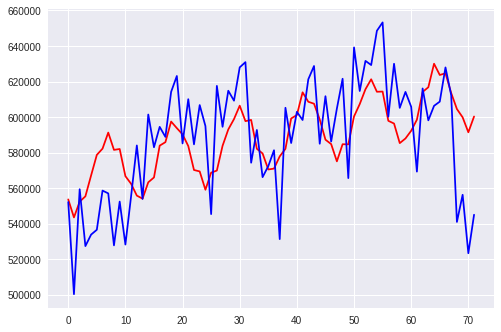

776514889.06852198

In [177]:
train_y = totalM.values[0:208]
train_x = np.arange(0, train_y.size, 1)
fit_y = totalM.values
fit_x = np.arange(0, fit_y.size, 1) 



fun = la
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)
plt.plot(fit_x, y_pred, 'r-', label='fit')



plt.plot(fit_x, fit_y, 'b-', label='data')

plt.show()
np.mean((fit_y - y_pred)**2) ##Error